## Problem Definition
- The problem mainly asks to predict the apparent temperature given the humidity. What is this apparent temperature?
- Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. -Wikipedia

# Background Study

**What is humidity?** - Humidity is a measure of the amount of water vapor in the air. Humidity depends on the temperature and pressure of the system of interest.

**What is temparature?** - Temperature is a physical quantity that expresses hot and cold. Temperature Depends on Particle Movement!

**Wind Bearing-**
The direction where the wind is came

Import Statements

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
weatherDataframe = pd.read_csv('weatherHistory.csv')
# Dataset is now stored in a Pandas Dataframe

In [3]:
weatherDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
weatherDataframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# (a). **Preprocess the dataset as specified in the data mining process:**

First of all we need to remove Columns That Contain a Single Value (Unique value columns).

In [5]:
# summarize the number of unique values in each column
print(weatherDataframe.nunique())

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


You can see loud cover feature contain only one value. So we can remove that column. Also you can see Formatted date is giving unique value count as near to the count of data rows. So we should remove that one as well.

To help highlight columns of this type, you can calculate the number of unique values for each variable as a percentage of the total number of rows in the dataset.

In [6]:
from numpy import unique

data = weatherDataframe.to_numpy().astype(str)

# summarize the number of unique values in each column
for i in range(data.shape[1]):
	num = len(unique(data[:, i]))
	percentage = float(num) / data.shape[0] * 100
	print('%s, %d, %.1f%%' % (weatherDataframe.columns[i], num, percentage))

Formatted Date, 96429, 100.0%
Summary, 27, 0.0%
Precip Type, 3, 0.0%
Temperature (C), 7574, 7.9%
Apparent Temperature (C), 8984, 9.3%
Humidity, 90, 0.1%
Wind Speed (km/h), 2484, 2.6%
Wind Bearing (degrees), 360, 0.4%
Visibility (km), 949, 1.0%
Loud Cover, 1, 0.0%
Pressure (millibars), 4979, 5.2%
Daily Summary, 214, 0.2%


As we can see Formatted Date column taking 100% number of unique value compared with datapoints. So we sould drop that column as well.Also by looking at the dataset we can conclude that Daily summary and Summary columns have a great similarity. (They looking derived attributes) So we can remove one of them. So I'll keep the Summary . So our final dataframe will be as follows

In [7]:
dropColumns=['Formatted Date','Loud Cover','Daily Summary']
weatherDataframe.drop(dropColumns, inplace=True, axis=1)
weatherDataframe

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


We need to find out duplicate rows and remove them as well.

In [8]:
weatherDataframe

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [9]:
# calculate duplicates
dups = weatherDataframe.duplicated()
# report if there are any duplicates
print(dups.any())

True


In [10]:
# list all duplicate rows
print(weatherDataframe[dups])

                   Summary Precip Type  Temperature (C)  \
28410             Overcast        rain         7.222222   
28607  Breezy and Overcast        rain         1.666667   
28920        Mostly Cloudy        snow        -1.666667   
29472             Overcast        snow        -4.444444   
29473        Mostly Cloudy        snow        -5.333333   
...                    ...         ...              ...   
64544                Foggy        snow        -4.927778   
64545                Foggy        snow        -3.888889   
64546                Foggy        snow        -2.716667   
64547             Overcast        snow        -2.244444   
64548             Overcast        snow        -2.244444   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
28410                  7.222222      0.93             4.8300   
28607                 -4.177778      0.75            28.9800   
28920                 -4.105556      0.88             6.4400   
29472                 -8.966667    

In [11]:
# delete duplicate rows
weatherDataframe.drop_duplicates(inplace=True)

In [12]:
weatherDataframe

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


There is one **important thing** to remember. When we removing rows, this will cause the indexes are to be different. As an example, if you remove row 18 from dataframe, now the indexes will be ..16,17,19,20.. like this. This will ultimately resulting difference between **actual row count (96381)** and the **last index.(96452)** In order to avoid this, we need to **reset indexes**. Then it will correct the order.

In [13]:
weatherDataframe=weatherDataframe.reset_index(drop=True)

In [14]:
weatherDataframe

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96376,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96377,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96378,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96379,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


### I). Handle Missing Values and Outliers if any

Checking whether any missing values

In [15]:
weatherDataframe.isnull().values.any()

True

In [16]:
#Getting the summary of what are missing value columns
weatherDataframe.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [17]:
weatherDataframe[weatherDataframe['Precip Type'].isna()]

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
52625,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163.0,9.982,1002.40
52627,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169.0,9.982,1001.79
52628,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151.0,9.982,1001.60
52630,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159.0,9.982,1001.92
52631,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197.0,16.100,1002.20
...,...,...,...,...,...,...,...,...,...
95512,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290.0,0.000,1021.73
95513,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293.0,0.000,1021.76
95514,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297.0,0.000,1021.81
95515,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299.0,0.000,1021.83


Checking the probability to drop it or replace with value.

In [18]:
weatherDataframe['Precip Type'].isna().sum()/(len(weatherDataframe))*100

0.5364127784521846

We can drop these rows because it has very low probability  and it ensures that no bias or variance is added or removed, and ultimately results in a robust and accurate model.

In [19]:
# make copy to avoid changing original data
new_weatherDf = weatherDataframe.copy()
# removing missing values
new_weatherDf=new_weatherDf.dropna(axis=0)
# We have to reset indexes because our dataframe still having previous indexes after dropping rows
new_weatherDf=new_weatherDf.reset_index(drop=True)

In [20]:
new_weatherDf.isnull().values.any()

False

Additionaly we can define custom missing value set when loading the dataset. If we want to map a list of values which must be treated as missing values in all columns, we can pass a list of candidates which we want to globally consider as missing values to the na_values parameter. This technique is used when some special characters treated as missing values.

In [21]:
missing_values = ["n.a.","NA","n/a", "na"]
df = pd.read_csv('weatherHistory.csv', na_values = missing_values)
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### *Handling* Ouitliers - Box Plots

In [22]:
# Simply you can use this to check 
# new_weatherDf.boxplot(figsize=(16,10));
# But I used the seabon library boxplot function

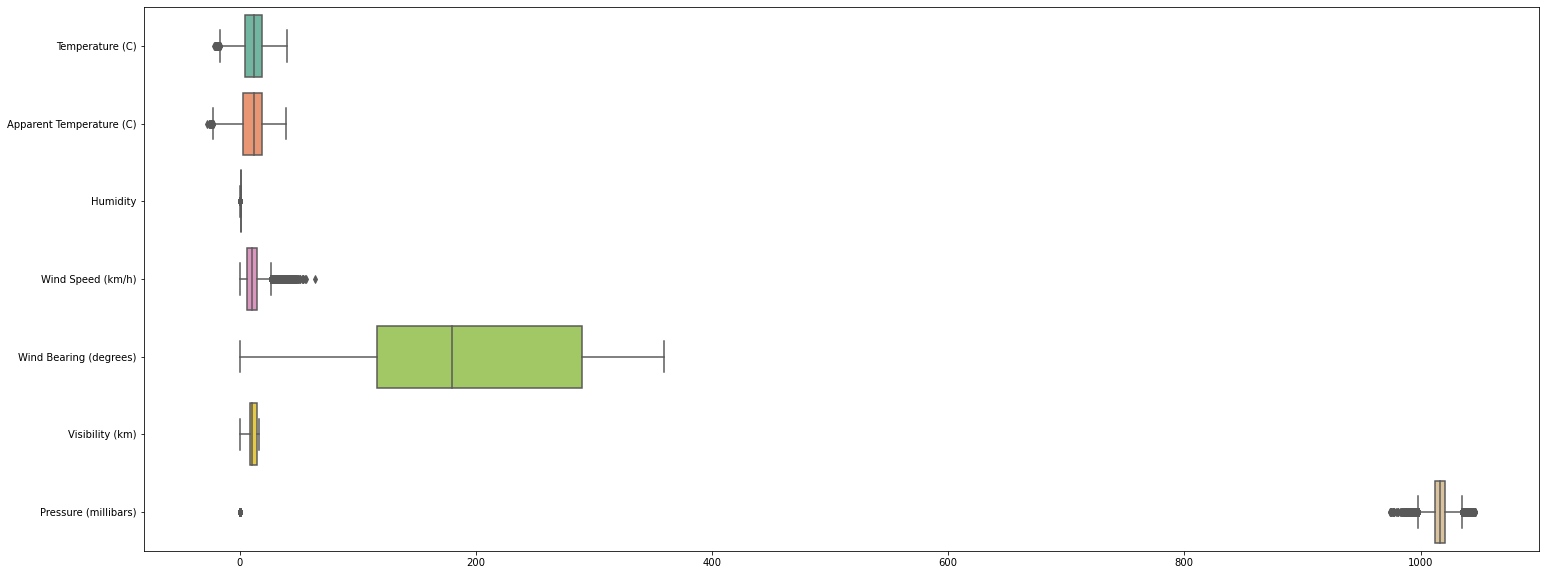

In [23]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(data=new_weatherDf, orient="h", palette="Set2",ax=ax );

We cannot clearly see the bloxpots. but form here, we can get a idea what coloumns will be the possible outliers. As you can see, **Pressure** colunm will have a outlier. Let's examine one by one to confirm it exactly.

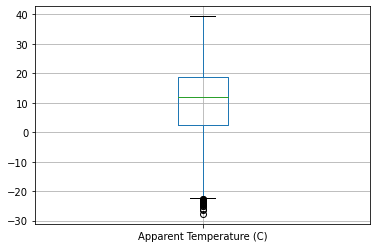

In [24]:
new_weatherDf.boxplot(column=['Apparent Temperature (C)']);

Same as previous plot, we cannot accept this having outliers

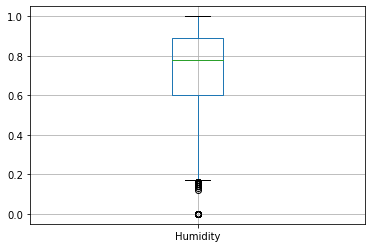

In [26]:
new_weatherDf.boxplot(column=['Humidity']);

We can see a possible outlier in this boxplot in 0.0 level. Let's remove the outliers.

Before Shape: (95864, 9)
After Shape: (95842, 9)


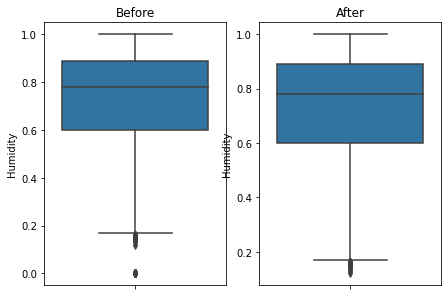

In [27]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",new_weatherDf.shape)
## Removing humidity bellow 0 outliers
new_weatherDf2 = new_weatherDf[(new_weatherDf['Humidity']>0.0)]
print("After Shape:",new_weatherDf2.shape)

sns.boxplot(new_weatherDf['Humidity'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(new_weatherDf2['Humidity'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
## Replace new dataset with previous and resetting indexes
new_weatherDf=new_weatherDf2;
new_weatherDf=new_weatherDf.reset_index(drop=True)

As you can see, now the outlier has removed successfully.

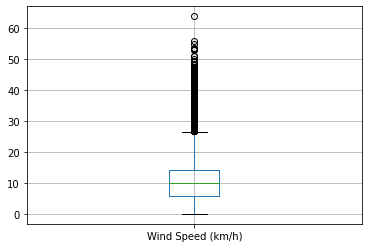

In [28]:
new_weatherDf.boxplot(column=['Wind Speed (km/h)']);

Here also we can identify a possible outlier above 60kmph. Lets remove that too!

Before Shape: (95842, 9)
After Shape: (95841, 9)


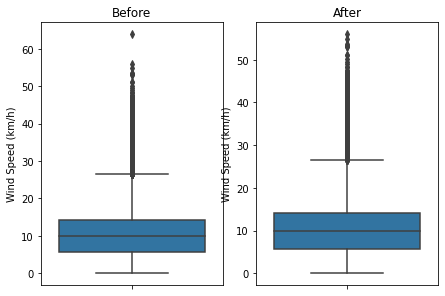

In [29]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",new_weatherDf.shape)
## Removing Windspeed above 60kmph outlier
new_weatherDf2 = new_weatherDf[ (new_weatherDf['Wind Speed (km/h)']<60)]
print("After Shape:",new_weatherDf2.shape)

sns.boxplot(new_weatherDf['Wind Speed (km/h)'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(new_weatherDf2['Wind Speed (km/h)'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
## Replace new dataset with previous and reset indexes
new_weatherDf=new_weatherDf2;
new_weatherDf=new_weatherDf.reset_index(drop=True)

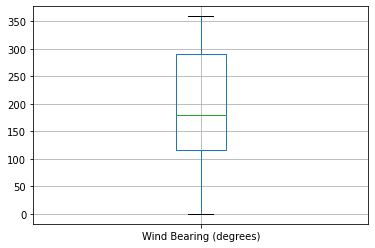

In [30]:
new_weatherDf.boxplot(column=['Wind Bearing (degrees)']);

No outliers are seen here. All scatterd nicely.

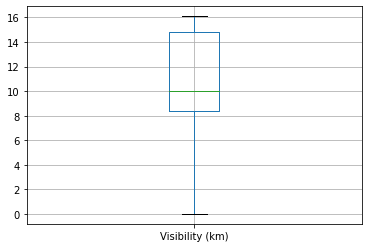

In [31]:
new_weatherDf.boxplot(column=['Visibility (km)']);

Same as the previous. No outliers.

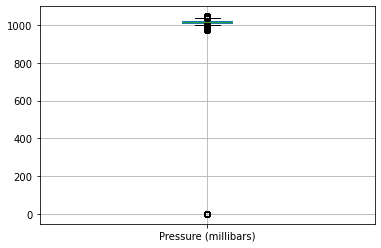

In [32]:
new_weatherDf.boxplot(column=['Pressure (millibars)']);

Perfect outlier can be seen in the 0 level. It's a pressure and it would not become 0 under normal conditions. This may due to a error in data entry or a problem in the collected equipment. So we should remove them.

Before Shape: (95841, 9)
After Shape: (94556, 9)


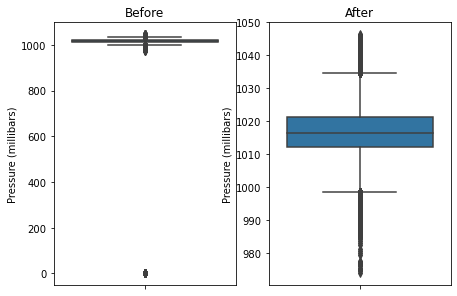

In [33]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

print("Before Shape:",new_weatherDf.shape)
## Removing Pressure bellow 800 outliers
new_weatherDf2 = new_weatherDf[ (new_weatherDf['Pressure (millibars)']>800)]
print("After Shape:",new_weatherDf2.shape)

sns.boxplot(new_weatherDf['Pressure (millibars)'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(new_weatherDf2['Pressure (millibars)'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()
# ## Replace new dataset with previous and reset indexes
new_weatherDf=new_weatherDf2;
new_weatherDf=new_weatherDf.reset_index(drop=True)

This is the Final outcome of removing outliers and missing values.

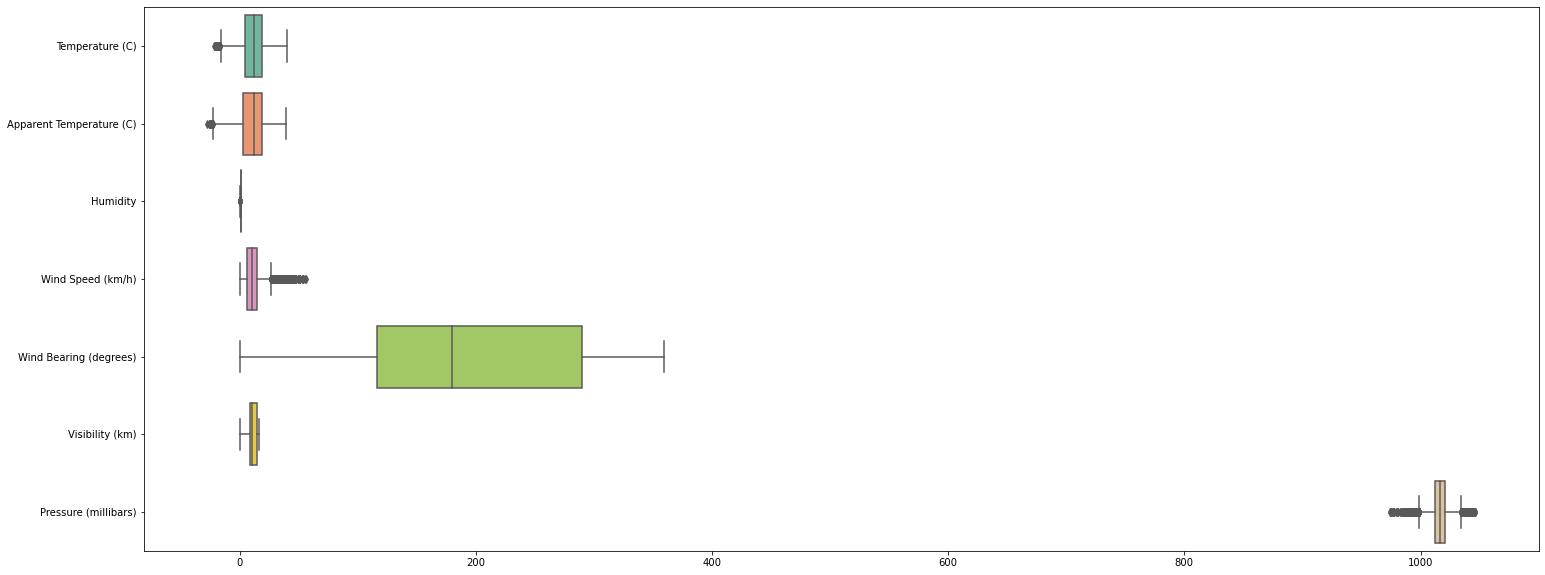

In [34]:
fig_dims = (25, 10);
fig, ax = plt.subplots(figsize=fig_dims);
sns.boxplot(data=new_weatherDf, orient="h", palette="Set2",ax=ax );

Now all the data preprocessing part is done. Now we have to do the transformations

Before doing that. We need to split the dataset into training and testing. Testing is needed to mesure the accuracy of the model. Why we doing the splitting here is to avoid the -> **Data Leakage Problem**

Testing data points represents real-world data. So the model should not seen that data. If it so, the effect will be over-fitting our training data and having an overly optimistic evaluation of the models performance on unseen data.

In order to avoid that, we should split our dataset into train and test set now  and do the tranforming steps. This will ensure no 'peeking ahead'. Otherwise, information from the test set will "leak" into your training data.

In [35]:
features_df= new_weatherDf.drop('Apparent Temperature (C)', 1)
features_df

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
94551,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36
94552,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16
94553,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66
94554,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [36]:
target = pd.DataFrame(new_weatherDf['Apparent Temperature (C)'], columns=["Apparent Temperature (C)"])
target

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
...,...
94551,26.016667
94552,24.583333
94553,22.038889
94554,21.522222


We defined the target as aperent temparature and features as the rest of them. Now we can split them out to 80% - 20% ratio

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, target, test_size = 0.2, random_state = 101)

Here also we need to reset all the indexes

In [38]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [39]:
X_train

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,19.105556,0.86,6.2951,84.0,9.9820,1014.38
1,Overcast,rain,12.150000,0.74,11.2539,348.0,11.2700,1019.79
2,Mostly Cloudy,rain,18.827778,0.90,6.8103,204.0,9.9820,1014.59
3,Overcast,snow,-0.022222,0.82,7.9373,11.0,11.2700,1016.34
4,Clear,rain,26.111111,0.47,17.7100,330.0,9.9820,1015.70
...,...,...,...,...,...,...,...,...
75639,Overcast,rain,2.644444,0.59,23.5060,179.0,10.0464,1010.52
75640,Overcast,rain,16.066667,0.93,8.9677,350.0,4.2987,1009.30
75641,Mostly Cloudy,rain,18.883333,0.47,24.1339,233.0,10.3523,1012.90
75642,Partly Cloudy,rain,12.416667,0.94,5.7638,256.0,9.7888,1020.70


### II). Produce Q-Q Plots and Histograms of the features, and apply the transformations if required. 

Then we should check one by one to apply transformations. 

It's not nessasary to transform the target variable. But reading lot of articleas and experience, I found that a target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable. So It's good to scalling that also

Q-Q Plots and Histograms